# Exploratory Data Analysis 

In [31]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import zscore

## Importing and Data Profiling  

In [ ]:
df = pd.read_csv('./data/raw/sierraleone-bumbuna.csv')
df

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-29 23:56,-1.6,-0.1,-2.9,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525596,2022-10-29 23:57,-1.7,-0.1,-3.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525597,2022-10-29 23:58,-1.7,-0.1,-3.1,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN
525598,2022-10-29 23:59,-1.7,-0.2,-3.3,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN


In [35]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [36]:
df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

#### Columns with more than 5% null values 

In [38]:
null_perc = (df.isnull().sum() / len(df)) * 100

columns_with_more_than_5_perc_nulls = null_perc[null_perc > 5]

print("Columns with more than 5% null values:")
print(columns_with_more_than_5_perc_nulls.sort_values(ascending=False))

Columns with more than 5% null values:
Comments    100.0
dtype: float64


### Data Cleaning and Outlier Detection 

In [42]:
# we will drop this column because it doesn't have any value 
df.drop('Comments', axis=1, inplace = True)
df

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-29 23:56,-1.6,-0.1,-2.9,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5
525596,2022-10-29 23:57,-1.7,-0.1,-3.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5
525597,2022-10-29 23:58,-1.7,-0.1,-3.1,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4
525598,2022-10-29 23:59,-1.7,-0.2,-3.3,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4


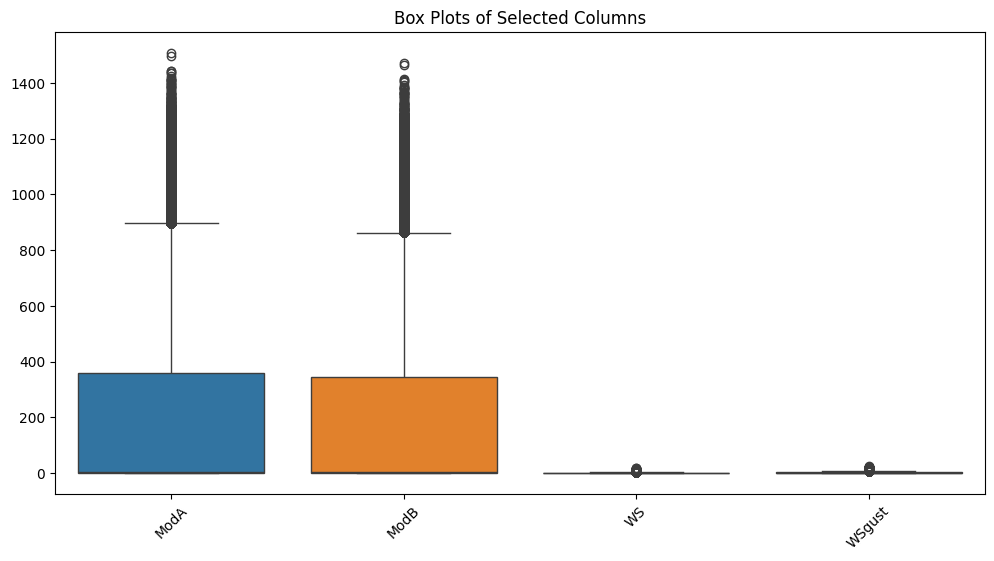

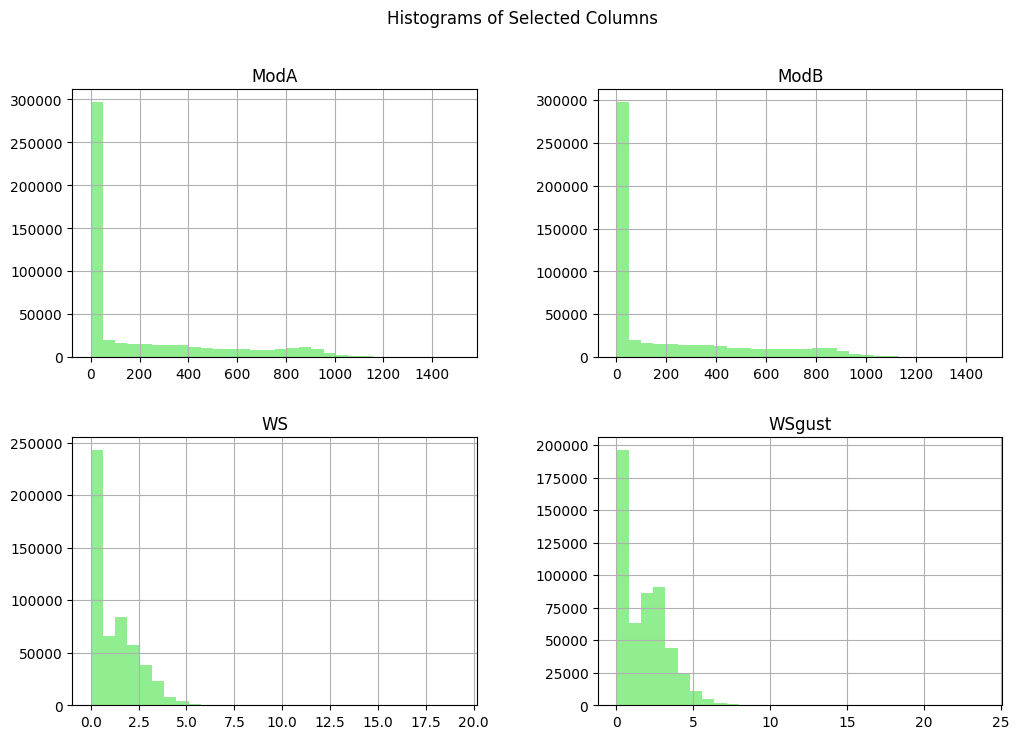

In [46]:
def Outlier_detection():
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df[['ModA', 'ModB','WS','WSgust']])
    plt.title('Box Plots of Selected Columns')
    plt.xticks(rotation=45)
    
    df[['ModA', 'ModB', 'WS', 'WSgust']].hist(bins=30, figsize=(12, 8), color='lightgreen')
    plt.suptitle('Histograms of Selected Columns')
    plt.show()

Outlier_detection()

### Calculating the Z-Scores and flagging rows with |z|>3

In [49]:
def flag_outliers_by_zscore(df, columns, threshold=3):
    # Compute Z-scores for the selected columns
    z_scores = df[columns].apply(zscore)
    
    # True if any |z| > threshold across the columns
    outlier = (np.abs(z_scores) > threshold).any(axis=1)
    
    # Add a new column to flag outliers
    df['is_outlier'] = outlier
    
    return df
    
columns = ['GHI','DNI','DHI','ModA', 'ModB', 'WS','WSgust']   
flag_outliers_by_zscore(df,columns)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,is_outlier
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,False
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,False
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,False
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,False
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-29 23:56,-1.6,-0.1,-2.9,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,False
525596,2022-10-29 23:57,-1.7,-0.1,-3.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,False
525597,2022-10-29 23:58,-1.7,-0.1,-3.1,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,False
525598,2022-10-29 23:59,-1.7,-0.2,-3.3,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,False


### Save the Cleaned DataFrame

In [ ]:
df.to_csv('./data/cleaned/sierraleone_cleaned.csv', index=False)